## Построение модели линейной одномерной регрессии

### Вариант 18
##### Чередова Александра
### Цель работы

изучение принципов построения модели линейной одномерной регрессии.

### Задачи 

 - реализовать конвейер для выполнения всех стадий обработки данных при решении задачи одномерной регрессии;
 - получение теоретических представлений о задаче регресии;
 - получение навыков использования пайплайна при решении задачи машинного обучения;
 - получение навыков рефакторинга кода в задачах машинного обучения.

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error

In [221]:
#### Загрузка данных и разделение на матрицу признаков и зависимую переменную

dataset = pd.read_csv("music/Music-genre.csv")
dataset.head()

dataset = dataset.dropna()
dataset = dataset[1:45000:1000]
# dataset = dataset[(dataset.music_genre == "Classical") | 
#               (dataset.music_genre == "Rock") ]

attribute_1 = "liveness"
attribute_2 = "energy"

X = dataset.loc[:, attribute_1].values
y = dataset.loc[:, attribute_2].values
# X = dataset['mode'].replace({'Minor': 0, 'Major': 1})
# random_indices = np.random.choice(dataset.index, size=10000, replace=False)
# dataset.iloc[random_indices]


print ("Матрица признаков"); print(X)
print ("Зависимая переменная"); print(y)
X = X.reshape(-1, 1)

Матрица признаков
[0.124  0.686  0.118  0.397  0.109  0.33   0.157  0.155  0.104  0.0702
 0.107  0.283  0.179  0.117  0.108  0.246  0.188  0.147  0.182  0.162
 0.115  0.129  0.0784 0.311  0.114  0.0889 0.113  0.0775 0.0801 0.14
 0.097  0.122  0.32   0.16   0.0955 0.104  0.621  0.281  0.16   0.117
 0.0963]
Зависимая переменная
[0.89   0.842  0.537  0.881  0.589  0.617  0.104  0.162  0.48   0.638
 0.891  0.971  0.833  0.591  0.711  0.823  0.302  0.361  0.719  0.632
 0.715  0.702  0.57   0.489  0.422  0.442  0.947  0.867  0.861  0.408
 0.829  0.42   0.866  0.787  0.121  0.0317 0.729  0.887  0.596  0.523
 0.447 ]


In [222]:
#### Обработка пропущенных значений

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X[:, :])
X_without_nan = X.copy()
X_without_nan[:, :] = imputer.transform(X[:, :])
X_without_nan

array([[0.124 ],
       [0.686 ],
       [0.118 ],
       [0.397 ],
       [0.109 ],
       [0.33  ],
       [0.157 ],
       [0.155 ],
       [0.104 ],
       [0.0702],
       [0.107 ],
       [0.283 ],
       [0.179 ],
       [0.117 ],
       [0.108 ],
       [0.246 ],
       [0.188 ],
       [0.147 ],
       [0.182 ],
       [0.162 ],
       [0.115 ],
       [0.129 ],
       [0.0784],
       [0.311 ],
       [0.114 ],
       [0.0889],
       [0.113 ],
       [0.0775],
       [0.0801],
       [0.14  ],
       [0.097 ],
       [0.122 ],
       [0.32  ],
       [0.16  ],
       [0.0955],
       [0.104 ],
       [0.621 ],
       [0.281 ],
       [0.16  ],
       [0.117 ],
       [0.0963]])

In [223]:
#### Разделение выборки на тестовую и тренировочную

from sklearn.model_selection import train_test_split

# y = dataset['music_genre'].replace({'Rock': 0, 'Classical': 1})
# ['Electronic' nan 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock' 'Classical' 'Hip-Hop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0) 

In [224]:
#### Обучение линейной модели регрессии

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

[0.54386765 0.55367357 0.57705193 0.55692057 0.55562177 0.56536275
 0.5364645  0.66991596 0.88941275 0.54912778 0.53815294]


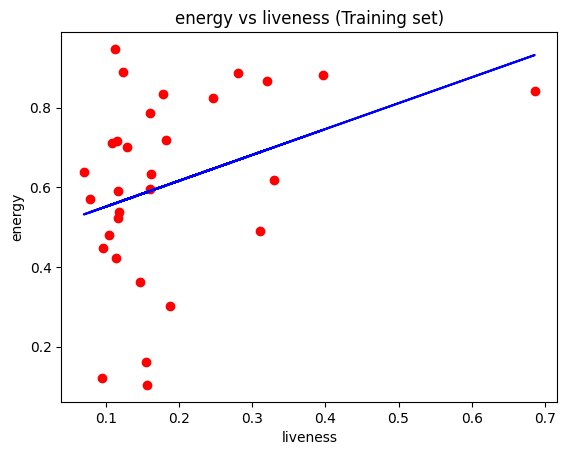

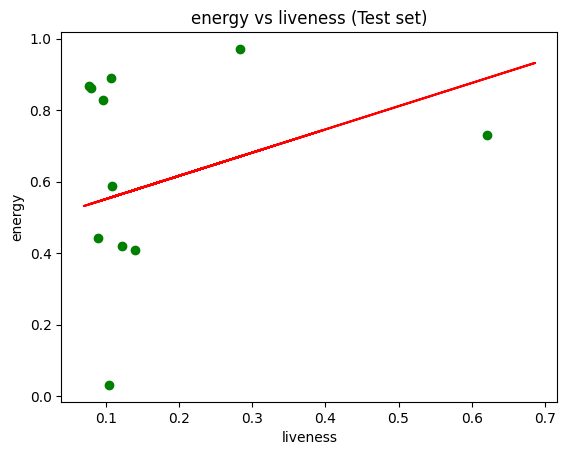

In [226]:
#### Предсказание, обработка и визуализация результатов

y_pred = regressor.predict(X_test)
print(y_pred)



# plt.title('danceability vs speechiness (Training set)')
# plt.xlabel('speechiness')
# plt.ylabel('danceability')


plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('energy vs liveness (Training set)')
plt.xlabel('liveness')
plt.ylabel('energy')
plt.show()

plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('energy vs liveness (Test set)')
plt.xlabel('liveness')
plt.ylabel('energy')
plt.show()

In [234]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.3f}')

Mean Absolute Error: 0.245


#### Использование модели
##### Оптимальные параметры определены, можно использовать модель

In [204]:
energy = [[0.77]]

regressor.predict(energy)

array([0.73477595])

In [206]:
liveness = [[0.73]]

regressor.predict(liveness)

array([0.72799069])

In [207]:
#### Параметры модели

a = regressor.coef_
b = regressor.intercept_

In [211]:
# Второй способ
energy = 0.71 

danceability  = a * energy + b 
danceability

array([0.72459806])

In [213]:
danceability = 0.72

energy  = a * energy + b 
energy

array([0.72707435])

1. Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?

- При реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков, потому что линейная регрессия сама по себе не зависит от масштаба признаков. Это происходит из-за того, что коэффициенты регрессии (веса) в итоговой модели масштабируются так, чтобы учесть разные масштабы признаков. Если бы вы использовали модели, которые чувствительны к масштабу, например, метод ближайших соседей, то масштабирование признаков могло бы быть важным.


2. Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?

- В линейной регрессии используется квадратичное отклонение (среднеквадратичная ошибка, MSE) как функция потерь, а не модуль отклонения (среднее абсолютное отклонение, MAE), потому что MSE обладает математическими свойствами, которые делают его более подходящим для обучения и оптимизации модели линейной регрессии. Он является дифференцируемым и выпуклым, что упрощает задачу оптимизации параметров модели. MAE может использоваться, если вы хотите создать модель, которая более устойчива к выбросам, но в большинстве случаев MSE предпочтительнее.


3. Что именно реализовано в методе `fit(X, y)` класса LinearRegression?

- Метод `fit(X, y)` класса LinearRegression выполняет обучение модели на обучающих данных. Он принимает матрицу признаков `X` и вектор целевых значений `y` как входные данные. Внутри метода происходит вычисление оптимальных весов (коэффициентов) для линейной модели, чтобы минимизировать функцию потерь (MSE) на предоставленных данных. После вызова метода `fit`, модель готова для предсказаний.


4. Поясните назначение метода `predict` класса `LinearRegression`.

- Метод `predict` класса LinearRegression используется для выполнения предсказаний на новых данных. Он принимает матрицу признаков `X_new` в качестве входных данных и возвращает предсказанные значения регрессии для этих данных. Этот метод использует обученные веса, которые были вычислены при вызове `fit`, чтобы выполнить предсказания.


5. По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?

- Точность модели машинного обучения оценивается на тестовой подвыборке. Это делается для того, чтобы проверить, как хорошо модель обобщает данные, которые она ранее не видела. Оценка на тренировочной подвыборке может дать завышенную оценку точности, так как модель могла запомнить обучающие данные и не способна будет обобщать на новые данные. Тестовая выборка служит для проверки обобщающей способности модели.